In [311]:
import os
import numpy as np
import pandas as pd
import cv2
import pytesseract
import imutils
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from keras import optimizers

from sklearn.metrics import f1_score
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

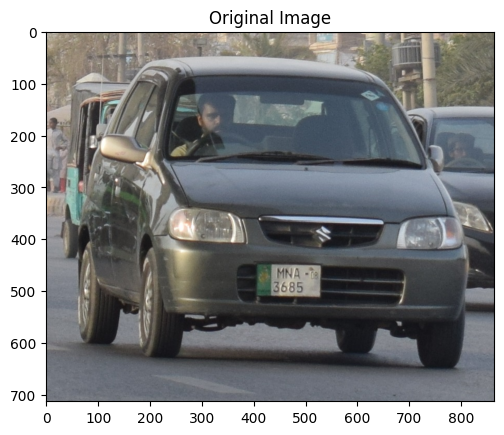

In [312]:
image = cv2.imread(r'D:\Users\Rameen-Laptop\Desktop\AI\Git\NumberPlateDataSet\Cars\DSC_0969.JPG')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

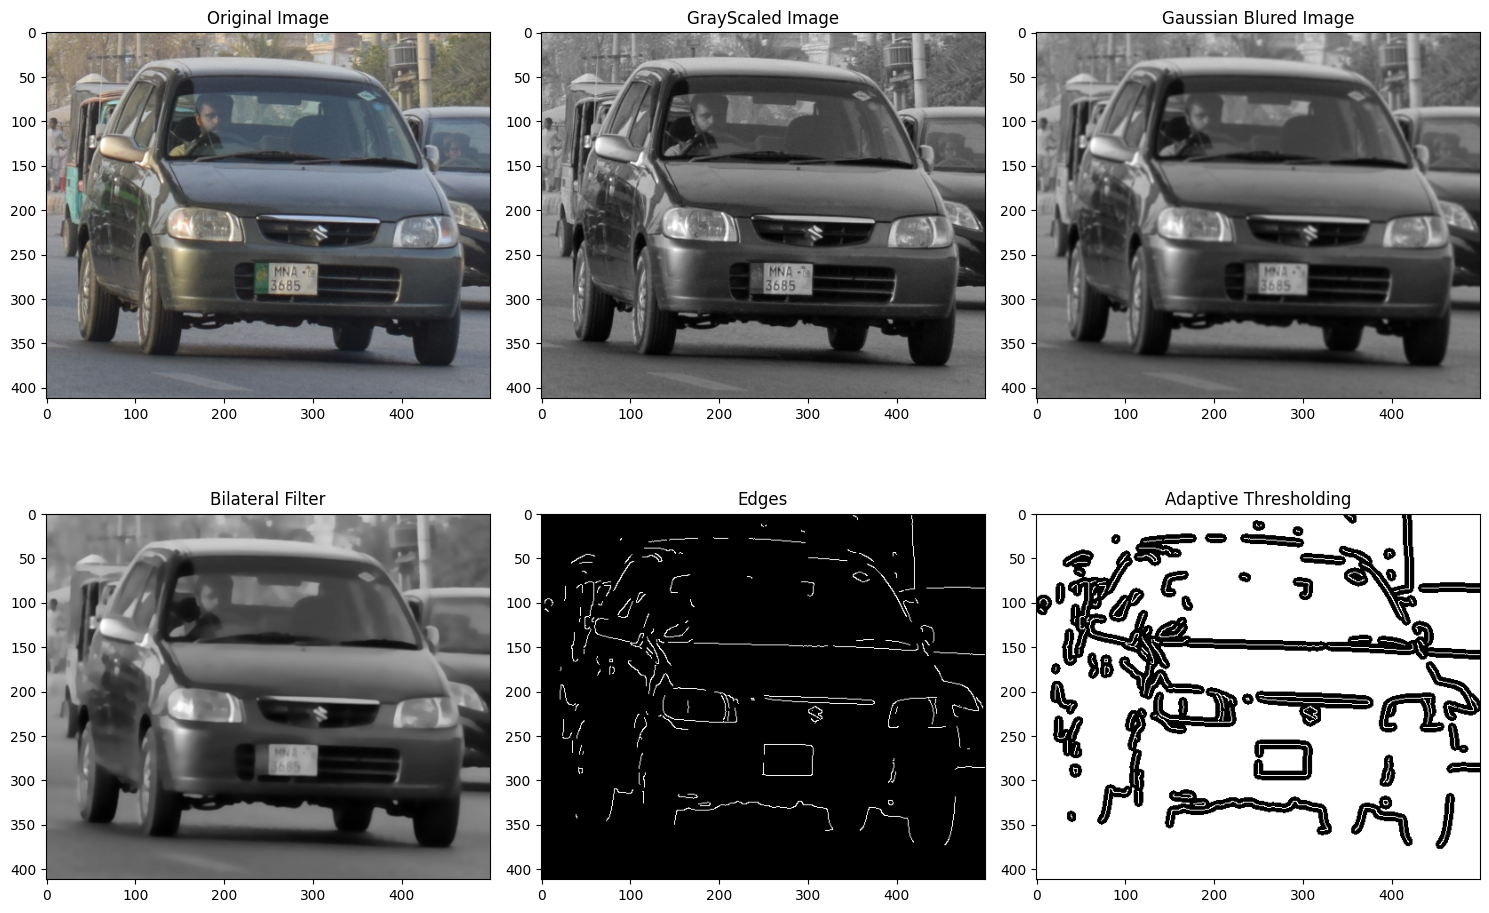

In [317]:
# image resized and graph sub plotted
image = imutils.resize(image,width=500)
fig,ax = plt.subplots(2,3,figsize=(15,10))

# display original image
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
ax[0,0].imshow(img)
ax[0,0].set_title('Original Image')

# RGB to grayscale conversion
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ax[0,1].imshow(gray_img,cmap='gray')
ax[0,1].set_title('GrayScaled Image')

# applying bilateral filter on grayscaled image
# gray_img = cv2.bilateralFilter(gray_img,11,17,17)
# ax[1,0].imshow(gray_img,cmap='gray')
# ax[1,0].set_title('Bilateral Filter')

# applying canny edges on bilateral filtered image
# edged = cv2.Canny(gray_img,170,200)
# ax[1,1].imshow(edged,cmap='gray')
# ax[1,1].set_title('Canny Edges on filtered')

# Applying GaussianBlur for additional smoothing
gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
ax[0,2].imshow(gray_img,cmap='gray')
ax[0,2].set_title('Gaussian Blured Image')

# Applying GaussianBlur for additional smoothing
gray_img = cv2.bilateralFilter(gray_img,11,17,17)
ax[1,0].imshow(gray_img,cmap='gray')
ax[1,0].set_title('Bilateral Filter')


edged = cv2.Canny(gray_img,170,200)
ax[1,1].imshow(edged, cmap='gray')
ax[1,1].set_title("Edges")


# Applying adaptive thresholding
thresh = cv2.adaptiveThreshold(edged, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
ax[1,2].imshow(thresh, cmap='gray')
ax[1,2].set_title('Adaptive Thresholding')


fig.tight_layout()
plt.show()

In [314]:
# # Applying GaussianBlur for additional smoothing
# gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
# plt.imshow(gray_img,cmap='gray')
# plt.title('Gaussian Blured Image')
# plt.show()

# # Applying GaussianBlur for additional smoothing
# gray_img = cv2.bilateralFilter(gray_img,11,17,17)
# plt.imshow(gray_img,cmap='gray')
# plt.title('Bilateral Filter')
# plt.show()

# edged = cv2.Canny(gray_img,170,200)
# plt.imshow(edged, cmap='gray')
# plt.title("Edges")
# plt.show()

# # Applying adaptive thresholding
# thresh = cv2.adaptiveThreshold(edged, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
# plt.imshow(thresh, cmap='gray')
# plt.title('Adaptive Thresholding')
# plt.show()

Number of contours: 30
None


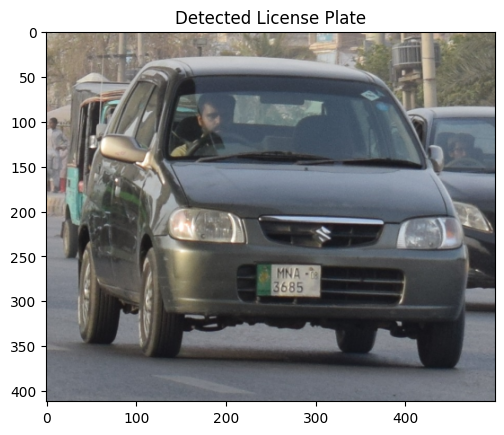

In [319]:
# # findding contours based on edges
# cnts = cv2.findContours(edged.copy(),cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

# Finding contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
cnts = sorted(cnts,key= cv2.contourArea,reverse=True)[:30] #sort contours based on their are keeping minimum required area

print("Number of contours:", len(cnts))

NumberPlateDetectedImage = image.copy()

NumberPlateCnt = None #currently we have no number plate contour
count = 0
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c,0.02 * peri, True)
    if len(approx) == 4: #slect the contour with 4 corners
        NumberPlateCnt = approx #this is our approximate numebr plate contour
        x,y,w,h = cv2.boundingRect(c)
        ROI = img[y:y+h, x:x+w]
        # Draw rectangle around the number plate
        cv2.rectangle(NumberPlateDetectedImage, (x, y), (x + w, y + h), (0, 255, 0), 2)
        break

print(NumberPlateCnt)

# if NumberPlateCnt is not None:
#     # Drawing the slected contour on teh original iamge
#     cv2.drawContours(image, [NumberPlateCnt],-1,(0,255,0),2)
    # image: The original image on which you want to draw the contour.
    # contours: The list of contours, and in this case, it's a list containing a single contour NumberPlateCnt.
    # contourIdx: -1, which means to draw all the contours in the list.
    # color: (0, 255, 0), representing the color green in BGR format.
    # thickness: 2, specifying the thickness of the contour lines.

plt.imshow(cv2.cvtColor(NumberPlateDetectedImage,cv2.COLOR_BGR2RGB))
plt.title("Detected License Plate")
plt.show()

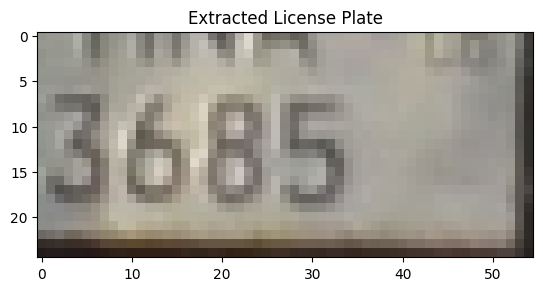

In [316]:
kernel = np.array([[-1,-1,-1],
                   [-1, 9,-1],
                   [-1,-1,-1]])
sharp_plate = cv2.filter2D(ROI, -1, kernel)

plt.imshow(ROI)
plt.title("Extracted License Plate")
plt.show()